# Decision Tree Classifier (cardiotocograph)
### Author : MD. Mehedi Hassan Galib
### Date : 03 August, 2020

<br/>

<br/>

# Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import metrics
import seaborn as sns

<br/>
<br/> 

## Getting dataset and Reconnaissance

In [2]:
df = pd.read_csv('C:/Users/Mehedi Hassan Galib/Desktop/R/Cardiotocographic.csv')
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120,0.000000,0.0,0.000000,0.000000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006380,0.0,0.006380,0.003190,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003322,0.0,0.008306,0.003322,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.002561,0.0,0.007682,0.002561,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.006515,0.0,0.008143,0.000000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1


In [3]:
df.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
LB,1.000000,-0.080862,-0.033350,-0.146372,-0.158845,-0.054799,-0.105236,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
AC,-0.080862,1.000000,0.046949,0.086653,-0.110934,-0.043733,-0.131007,-0.280089,0.207595,-0.374335,...,-0.154934,0.393712,0.189319,-0.006412,0.243845,0.270496,0.272948,0.126380,0.029341,-0.363849
FM,-0.033350,0.046949,1.000000,-0.069981,0.050401,-0.010824,0.265627,-0.103721,0.121213,-0.074190,...,-0.153883,0.099619,0.164450,-0.017855,-0.061042,-0.089502,-0.072175,0.179309,-0.001295,0.087933
UC,-0.146372,0.086653,-0.069981,1.000000,0.287032,0.006751,0.087898,-0.229072,0.286907,-0.308000,...,-0.111860,0.120195,0.081860,0.057815,-0.106559,-0.190340,-0.142111,0.238755,-0.074167,-0.203824
DL,-0.158845,-0.110934,0.050401,0.287032,1.000000,0.115216,0.231103,-0.117416,0.563260,-0.272250,...,-0.553921,0.217002,0.397183,0.235296,-0.350232,-0.530564,-0.390822,0.567483,-0.000102,0.062702
DS,-0.054799,-0.043733,-0.010824,0.006751,0.115216,1.000000,0.009848,0.037306,0.034632,-0.030506,...,-0.071670,-0.021600,0.006892,0.049462,-0.216356,-0.162154,-0.165038,0.132999,-0.074977,0.135629
DP,-0.105236,-0.131007,0.265627,0.087898,0.231103,0.009848,1.000000,0.048813,0.268688,-0.138521,...,-0.278293,0.120019,0.221066,0.057278,-0.437137,-0.492250,-0.448311,0.505023,-0.218177,0.488277
ASTV,0.305570,-0.280089,-0.103721,-0.229072,-0.117416,0.037306,0.048813,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
MSTV,-0.279607,0.207595,0.121213,0.286907,0.563260,0.034632,0.268688,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
ALTV,0.285630,-0.374335,-0.074190,-0.308000,-0.272250,-0.030506,-0.138521,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


<br/>
<br/>

## Converting to DataFrame

In [4]:
X = pd.DataFrame(df[['LB','AC','FM']])
y = pd.DataFrame(df.NSP)

<br/>
<br/>

## Splitting into Train and Test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23, stratify = y)

<br/>
<br/>

## Model build up

In [6]:
dt = DecisionTreeClassifier(criterion = 'gini', random_state = 23)
model = dt.fit(X_train, y_train)

<br/>
<br/>

## Prediction

In [7]:
y_pred = dt.predict(X_test)
y_pred

array([3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       3, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,

<br/>
<br/>

## Model Accuracy

In [8]:
metrics.accuracy_score(y_test, y_pred)

0.8004694835680751

In [9]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.87      0.91      0.89       332
           2       0.49      0.42      0.45        59
           3       0.48      0.40      0.44        35

    accuracy                           0.80       426
   macro avg       0.62      0.58      0.59       426
weighted avg       0.79      0.80      0.79       426



<br/>
<br/>

## Confusion matrix

In [10]:
con_mat = metrics.confusion_matrix(y_test, y_pred)
con_mat

array([[302,  20,  10],
       [ 29,  25,   5],
       [ 15,   6,  14]], dtype=int64)

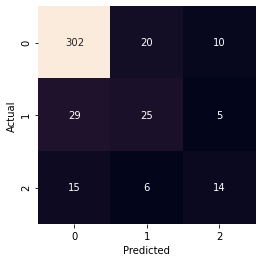

In [16]:
sns.heatmap(con_mat, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<br/>
<br/>

## Visualize the tree

In [14]:
un = df['NSP'].unique()
un

array([2, 1, 3], dtype=int64)

In [15]:
# export_graphviz(dt, out_file = "cfr.dot", feature_names = un)